# **Import Packages**

In [ ]:
import IPython
from google.colab import files
import matplotlib.pyplot as plt
import librosa
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

# **Download Data from Kaggle**

In [ ]:
# Install the Kaggle API client.
!pip install -q kaggle

# Upload your Kaggle API credentials (kaggle.json).
from google.colab import files
files.upload()

# Make sure the Kaggle API client is configured correctly.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle.
!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022


# Unzip the downloaded dataset.
!unzip sound-of-114-species-of-birds-till-2022.zip

# **Test Audio Files**



In [ ]:
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')

In [ ]:
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Okarito Kiwi_sound/Okarito Kiwi2.mp3')

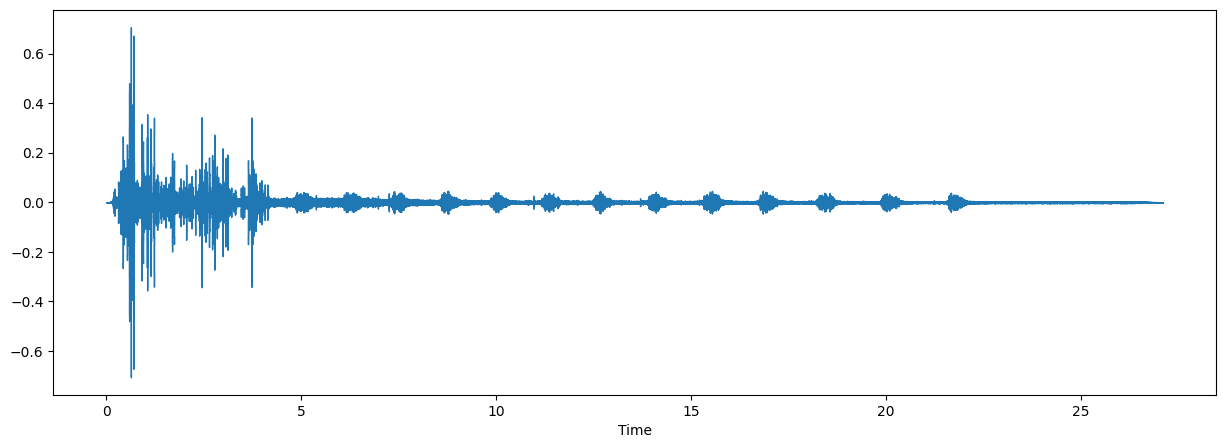

In [ ]:
# Set Plot Size
plt.figure(figsize=(15,5))

# Load Audio File to extract Audio Data and Sample Rate
audio_data, sample_rate = librosa.load(path='/content/Voice of Birds/Voice of Birds/Okarito Kiwi_sound/Okarito Kiwi2.mp3')
librosa.display.waveshow(y=audio_data, sr=sample_rate)

# View and Hear Audio File
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Okarito Kiwi_sound/Okarito Kiwi2.mp3')

# **Retrieve File Names and Classes**

In [ ]:
data = [] #Create Emtpy list to append data to
directory = '/content/Voice of Birds/Voice of Birds' #Creates a file directory
for target_class in os.listdir(directory):  #Loops through all files with containing the directory, retrieves classes

      target_class_path = os.path.join(directory, target_class) #Combines the directory and target class

      for audio_file in os.listdir(target_class_path):  #Retrieves Audio File Name

        audio_path = os.path.join(directory, target_class, audio_file)  #Combines whole file name
        data.append({
                'Class': target_class,
                'File_Name': audio_file, #Appends extracted file information to emptly list
                'Path': audio_path
            })
audio_data = pd.DataFrame(data) #Creates Dataframe of data
audio_data

,Class,File_Name,Path
0,Collared Brushturkey_sound,Collared Brushturkey12.mp3,/content/Voice of Birds/Voice of Birds/Collare...
1,Collared Brushturkey_sound,Collared Brushturkey19.mp3,/content/Voice of Birds/Voice of Birds/Collare...
2,Collared Brushturkey_sound,Collared Brushturkey13.mp3,/content/Voice of Birds/Voice of Birds/Collare...
3,Collared Brushturkey_sound,Collared Brushturkey4.mp3,/content/Voice of Birds/Voice of Birds/Collare...
4,Collared Brushturkey_sound,Collared Brushturkey6.mp3,/content/Voice of Birds/Voice of Birds/Collare...
...,...,...,...
2156,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca10.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2157,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca17.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2158,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca25.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2159,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca9.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...


# **Metadata Exploration**

In [ ]:
metadata = pd.read_csv('Birds Voice.csv') # Creating metadata dataframe
metadata.head()

,common_name,scientific_name,recordist_name,recording_length,Date,TYPE,xc_id,Time,Country,Download_link
0,Common Ostrich,Struthio camelus australis,Frank Lambert,0:53,2019-10-30,call,XC516153,08:05,South Africa,https://xeno-canto.org/516153/download
1,Common Ostrich,Struthio camelus,Jeremy Hegge,0:26,2014-11-20,call,XC208209,04:00,South Africa,https://xeno-canto.org/208209/download
2,Common Ostrich,Struthio camelus,Jeremy Hegge,0:04,2014-11-21,call,XC208128,06:00,South Africa,https://xeno-canto.org/208128/download
3,Common Ostrich,Struthio camelus,Derek Solomon,0:11,2010-02-09,call,XC46725,07:00,South Africa,https://xeno-canto.org/46725/download
4,Common Ostrich,Struthio camelus,Morioka Zoological Park ZOOMO,1:47,2021-09-06,"voice during egg laying, zoo collection",XC675445,17:00,Japan,https://xeno-canto.org/675445/download


In [ ]:
# converting recording length to seconds (int)
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

metadata['length_in_seconds'] = metadata['recording_length'].apply(convert_to_seconds) #Creating newe Feature
metadata.head()

,common_name,scientific_name,recordist_name,recording_length,Date,TYPE,xc_id,Time,Country,Download_link,length_in_seconds
0,Common Ostrich,Struthio camelus australis,Frank Lambert,0:53,2019-10-30,call,XC516153,08:05,South Africa,https://xeno-canto.org/516153/download,53
1,Common Ostrich,Struthio camelus,Jeremy Hegge,0:26,2014-11-20,call,XC208209,04:00,South Africa,https://xeno-canto.org/208209/download,26
2,Common Ostrich,Struthio camelus,Jeremy Hegge,0:04,2014-11-21,call,XC208128,06:00,South Africa,https://xeno-canto.org/208128/download,4
3,Common Ostrich,Struthio camelus,Derek Solomon,0:11,2010-02-09,call,XC46725,07:00,South Africa,https://xeno-canto.org/46725/download,11
4,Common Ostrich,Struthio camelus,Morioka Zoological Park ZOOMO,1:47,2021-09-06,"voice during egg laying, zoo collection",XC675445,17:00,Japan,https://xeno-canto.org/675445/download,107


In [ ]:
print('lengths for Song')
print(metadata[metadata['TYPE']=='song']['length_in_seconds'].describe()) #Exploring Song Lengths
print('lengths for Call')
print(metadata[metadata['TYPE'] == 'call']['length_in_seconds'].describe()) #Exploring Call Lengths

lengths for Song
count    1154.000000
mean       46.555459
std        56.224267
min         1.000000
25%        13.000000
50%        30.000000
75%        59.000000
max       510.000000
Name: length_in_seconds, dtype: float64
lengths for Call
count    511.000000
mean      41.348337
std       52.586399
min        1.000000
25%       13.000000
50%       26.000000
75%       52.000000
max      638.000000
Name: length_in_seconds, dtype: float64


# **Filtering Data**

In [ ]:
# Creating new dataframe with only classe's with 30 instances

class_counts = audio_data['Class'].value_counts()
classes_with_30_counts = class_counts[class_counts == 30].index
filtered_audio_data = audio_data[audio_data['Class'].isin(classes_with_30_counts)]
filtered_audio_data

,Class,File_Name,Path
20,Grey-headed Chachalaca_sound,Grey-headed Chachalaca18.mp3,/content/Voice of Birds/Voice of Birds/Grey-he...
21,Grey-headed Chachalaca_sound,Grey-headed Chachalaca29.mp3,/content/Voice of Birds/Voice of Birds/Grey-he...
22,Grey-headed Chachalaca_sound,Grey-headed Chachalaca9.mp3,/content/Voice of Birds/Voice of Birds/Grey-he...
23,Grey-headed Chachalaca_sound,Grey-headed Chachalaca7.mp3,/content/Voice of Birds/Voice of Birds/Grey-he...
24,Grey-headed Chachalaca_sound,Grey-headed Chachalaca5.mp3,/content/Voice of Birds/Voice of Birds/Grey-he...
...,...,...,...
2156,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca10.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2157,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca17.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2158,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca25.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...
2159,Rufous-bellied Chachalaca_sound,Rufous-bellied Chachalaca9.mp3,/content/Voice of Birds/Voice of Birds/Rufous-...


# **Data Preprocessing**

In [ ]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [ ]:
# Applying MP3 to tensor function to data

filtered_audio_data['Features'] = filtered_audio_data['Path'].apply(audio_to_tensors)

<ipython-input-14-6b86c5d47672>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate =librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-15-6da51d2ff38a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_audio_data['Features'] = filtered_audio_data['Path'].apply(audio_to_tensors)


In [ ]:
# Encoding Feature Classes

from sklearn.preprocessing import LabelEncoder
filtered_audio_data['Encoded Targets'] = LabelEncoder().fit_transform(filtered_audio_data['Class'])

<ipython-input-16-a011bed5db17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_audio_data['Encoded Targets'] = LabelEncoder().fit_transform(filtered_audio_data['Class'])


In [ ]:
#Preparing data for CNN model

features = np.array(filtered_audio_data['Features']).tolist() #Converting features to np array then list
target = np.array(filtered_audio_data['Encoded Targets']) #Converting Targets to array
features_tensor = tf.convert_to_tensor(features).numpy() #Converting featurs into tensors
target_tensor = tf.convert_to_tensor(target).numpy() #Converting targets to tensors
#The above lines assure matching data type

# **Training CNN Model**

In [ ]:
#Creating Training, Validation, and Test Data

X_train, X_test, y_train, y_test = train_test_split(features_tensor, target_tensor, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1)

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [ ]:
#Creating CNN Model
model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=(input_shape)),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

In [ ]:
#Compiling the Model

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<Sequential name=sequential, built=True>

In [ ]:
# Training Model

modelhistory = model.fit(X_train, y_train, # Training with 80%
                         epochs=700,
                         batch_size=32,
                         validation_data=(X_val, y_val)) #Validating with %10

Epoch 1/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.0101 - loss: 17.2906 - val_accuracy: 0.0290 - val_loss: 16.6487
Epoch 2/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.0113 - loss: 17.0253 - val_accuracy: 0.0217 - val_loss: 16.5548
Epoch 3/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0135 - loss: 16.7735 - val_accuracy: 0.0217 - val_loss: 16.4737
Epoch 4/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.0410 - loss: 16.5464 - val_accuracy: 0.0217 - val_loss: 16.3809
Epoch 5/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.0349 - loss: 16.3674 - val_accuracy: 0.0217 - val_loss: 16.2802
Epoch 6/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0935 - loss: 16.1367 - val_accuracy: 0.0507 - val_loss: 16.1683
Epoch 7/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0788 - loss: 15.9671 - val_accuracy: 0.0652 - val_loss: 16.0457
Epoch 8/700
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.1025 - loss: 15.8163 - v

# **Evaluating and Exploring Model**

In [ ]:
#Evaluating model on test data

model.evaluate(X_test, y_test)

In [ ]:
# Accessing the parameters used during training
modelhistory.params

# Getting the keys available in the training history
modelhistory.history.keys()

# Extracting training accuracy values from the history
accuracy = modelhistory.history['accuracy']

# Extracting validation accuracy values from the history
val_accuracy = modelhistory.history['val_accuracy']

# Extracting training loss values from the history
loss = modelhistory.history['loss']

# Extracting validation loss values from the history
val_loss = modelhistory.history['val_loss']


In [ ]:
#Saving Model as Keras File

model.save('BirdClassifierModel.keras')

In [ ]:
#Plotting Training vs Validation Accuracy

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

#Plotting Training vs Validation Loss

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [ ]:
#Creating Model summary
 model.summary()

In [ ]:
# Get model summary as txt file

with open("network.txt", "w") as f:
    print(model.summary(), file=f)